In [1]:
import torchvision.datasets as dset

train_dataset = dset.MNIST(root = 'data/', train = True, download = True)
test_dataset = dset.MNIST(root = 'data/', train = False, download = True)

train_images = train_dataset.data
train_labels = train_dataset.targets

test_images = test_dataset.data
test_labels = test_dataset.targets

In [2]:
import torchvision.transforms as transforms


#define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

#apply transformations to dataset
train_dataset = dset.MNIST(root = 'data/', train = True, download = True, transform = transform)
test_dataset = dset.MNIST(root = 'data/', train = False, download = True, transform = transform)


In [4]:
from torch.utils.data import DataLoader

#create data loaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = batch_size, shuffle = False)

NameError: name 'train_dataset' is not defined

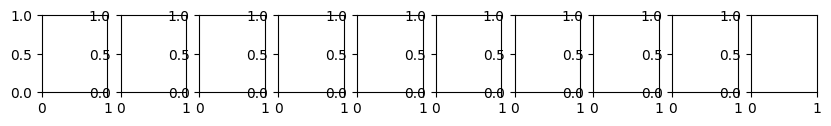

In [2]:
import matplotlib.pyplot as plt

#verify data
fig, axes = plt.subplots(1, 10, figsize = (10, 1))
for i, ax in enumerate(axes):
    ax.imshow(train_dataset.data[i], cmap = 'gray')
    ax.axis('off')
plt.show()

In [6]:
import torch.nn as nn
import torch
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as dsets

class numbers(nn.Module):
    def __init__(self):
        super(numbers, self).__init__()
        #define layers
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 16, kernel_size = 5, stride = 1, padding = 2)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size = 2)
        self.conv2 = nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size = 5, stride = 1, padding = 2)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size = 2)
        self.fc1 = nn.Linear(7 * 7 * 32, 10)

    #define forward pass
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.maxpool1(out)
        out = self.conv2(out)
        out = self.relu2(out)
        out = self.maxpool2(out)
        #flatten
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        return out
    
model = numbers()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

#train model
num_epochs = 10

for epoch in range(num_epochs):
    for images, labels in train_loader:
        #forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        #backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch: {epoch + 1}, Loss: {loss.item():.4f}')  

#save model
torch.save(model.state_dict(), 'model.pth')

Epoch: 1, Loss: 0.0555
Epoch: 2, Loss: 0.0166
Epoch: 3, Loss: 0.1357
Epoch: 4, Loss: 0.0194
Epoch: 5, Loss: 0.0292
Epoch: 6, Loss: 0.0007
Epoch: 7, Loss: 0.1114
Epoch: 8, Loss: 0.0052
Epoch: 9, Loss: 0.0000
Epoch: 10, Loss: 0.0099


In [4]:
#create gui
import tkinter as tk
from PIL import ImageTk, Image, ImageDraw
import PIL
import numpy as np

#load model
model = numbers()
model.load_state_dict(torch.load('model.pth'))

#dictionary to label all the classes
classes = {
    0: 'Zero',
    1: 'One',
    2: 'Two',
    3: 'Three',
    4: 'Four',
    5: 'Five',
    6: 'Six',
    7: 'Seven',
    8: 'Eight',
    9: 'Nine'
}

#initialise GUI
window = tk.Tk()
window.title('Number Classifier')
window.geometry('600x600')

#initialise drawing area
canvas_width = 600
canvas_height = 400
canvas_colour = 'black'

#initialise canvas
canvas = tk.Canvas(window, width = canvas_width, height = canvas_height, bg = canvas_colour)
canvas.pack()

#initialise PIL image
img = PIL.Image.new('RGB', (600, 400), canvas_colour)
draw = ImageDraw.Draw(img)

#function to clear canvas
def clear_canvas():
    canvas.delete('all')
    draw.rectangle((0, 0, 600, 400), fill = canvas_colour)


#function to classify image
def classify_image():
    #convert image to MNIST format
    img_resized = img.resize((28, 28)).convert('L')
    img_np = np.array(img_resized)
    img_normalized = img_np / 255.0
    img_tensor = torch.from_numpy(img_normalized).unsqueeze(0).unsqueeze(0).float()
    
    #get prediction
    outputs = model(img_tensor)
    _, predicted = torch.max(outputs.data, 1)
    
    #display prediction
    label = tk.Label(window, text=f'Prediction: {classes[predicted.item()]}', font=('Arial', 32))
    label.place(x=100, y=450)

#function to draw on canvas
def draw_on_canvas(event):
    x = event.x
    y = event.y
    r = 8
    canvas.create_oval(x - r, y - r, x + r, y + r, fill = 'white')
    draw.rectangle((x - r, y - r, x + r, y + r), fill = 'white')

#bind mouse drag event to canvas
canvas.bind('<B1-Motion>', draw_on_canvas)

#add buttons
button_clear = tk.Button(window, text = 'Clear', font = ('Arial', 32), command = clear_canvas)
button_clear.place(x = 100, y = 500)

button_classify = tk.Button(window, text = 'Classify', font = ('Arial', 32), command = classify_image)
button_classify.place(x = 300, y = 500)

window.mainloop()

# 



NameError: name 'numbers' is not defined